In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import xarray as xr
import math

In [7]:
# Create a set of hidden variables, z, which control the entire system. (If we could observe all of Z, we'd have R^2 = 1)
Nz = 7 # Number of hidden variables 
M = 1000 # Number of samples / data-points

Z = np.random.randn(M, Nz)

In [8]:
# Create the target of the prediction, y, which is a function of the Z variables, like Y = 0.1*z[0] + 0.2*z[1]...
cz = np.random.rand(Nz) # Random coefficient vector
y = Z.dot(cz)

In [9]:
# Create the observed variables (A subset of the hidden variables)
Nx = 4
X = Z[:,:Nx] # Just take the first 4 variables from Z

In [10]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

regr = linear_model.LinearRegression(fit_intercept=True)
regr.fit(X, y)

model = linear_model.LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)

LinearRegression()

<IPython.core.display.Javascript object>


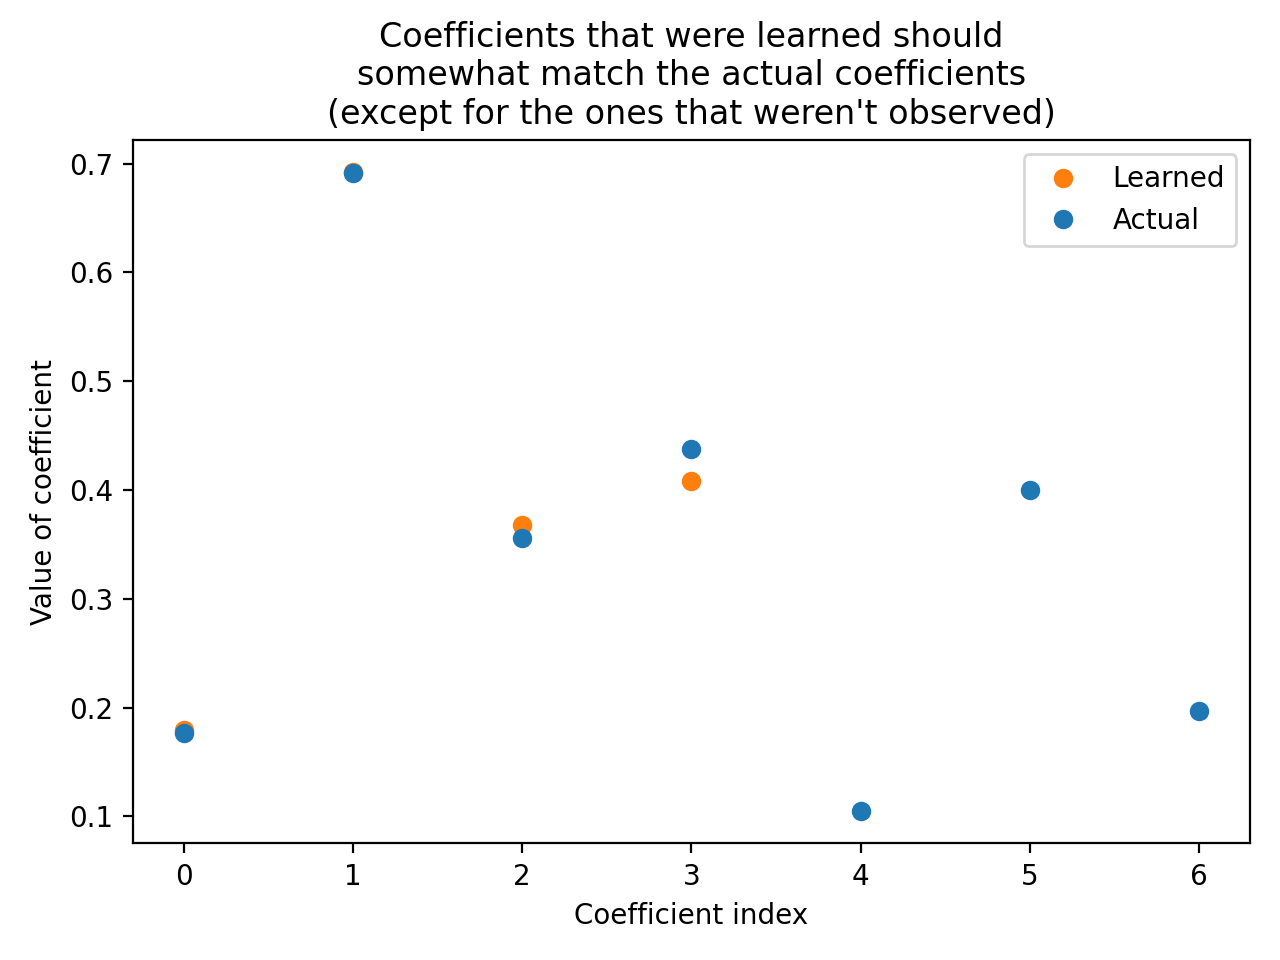

In [11]:
plt.figure()
plt.plot(model.coef_, 'C1o', label='Learned')
plt.plot(cz, 'C0o', label='Actual')
plt.title('Coefficients that were learned should\nsomewhat match the actual coefficients\n(except for the ones that weren\'t observed)')
plt.xlabel('Coefficient index')
plt.ylabel('Value of coefficient')
plt.legend()
plt.tight_layout()

In [12]:
# Compute R^2 of entire dataset
y_pred = regr.predict(X)
r = np.corrcoef(y_pred, y)[0,1] # Take the off-diagonal element
r2 = r**2
print('Achieved R^2 is %.1f%%' % (r2*100))

# Since we know the underlying data we should be able to predict the best achievable R^2. 
# If I'm thinking about this right, it should be identical to the amount of "energy" in the coefficient array
# that we're actually observing.
r2_theory = sum(cz[:Nx]**2)/sum(cz**2)
print('Theoretical R^2 is %.1f%%' % (r2_theory*100))

Achieved R^2 is 78.7%
Theoretical R^2 is 79.8%


In [13]:
# R2 of Train

y_train_pred = model.predict(X_train)
r_train = np.corrcoef(y_train_pred, y_train)[0,1] # Take the off-diagonal element
r2_train = r_train**2
print('Achieved R^2 is %.1f%%' % (r2_train*100))


Achieved R^2 is 79.5%


In [14]:
# R2 of Test

y_test_pred = model.predict(X_test)
r_test = np.corrcoef(y_test_pred, y_test)[0,1] # Take the off-diagonal element
r2_test = r_test**2
print('Achieved R^2 is %.1f%%' % (r2_test*100))


Achieved R^2 is 76.4%


In [15]:
#USING SKLEARN- This corresponds with the corrcoeff method

from sklearn.metrics import r2_score
r2_train_sk = r2_score(y_train, y_train_pred)
r2_test_sk = r2_score(y_test, y_test_pred)

print('Achieved R^2 (Train) is %.1f%%' % (r2_train_sk*100))
print('Achieved R^2 (Test) is %.1f%%' % (r2_test_sk*100))


Achieved R^2 (Train) is 79.5%
Achieved R^2 (Test) is 76.2%
